# Section 2.1 Distributions

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import scipy
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

# Distributions
A range of values and the relative occurrence, or belief, in each value

# Let's start an observed point

In [3]:
observation = ["cow"]

Not much to see here

# Observed distribution
What we have seen and how much of each 

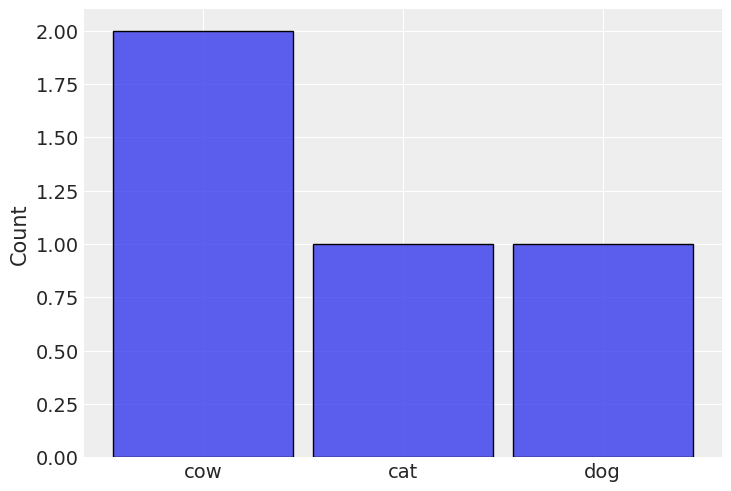

In [4]:
observations = ["cow", "cow", "cat", "dog"]
sns.histplot(observations, shrink=.9);

# Thats for things we can observe
What about things we can't directly observe like estimates?

# Expressing a single belief with a point estimates 
Point estimates are what they sound like, an estimate of a single point describing a dataset

Examples include
* Mean
* Median
* Standard Deviation
* Quantile

For example if we observe the values  
`observations = [2,2,4,6]`  
we could estimate the true population mean to be 3.5


# Expressing infinite beliefs with a distributions

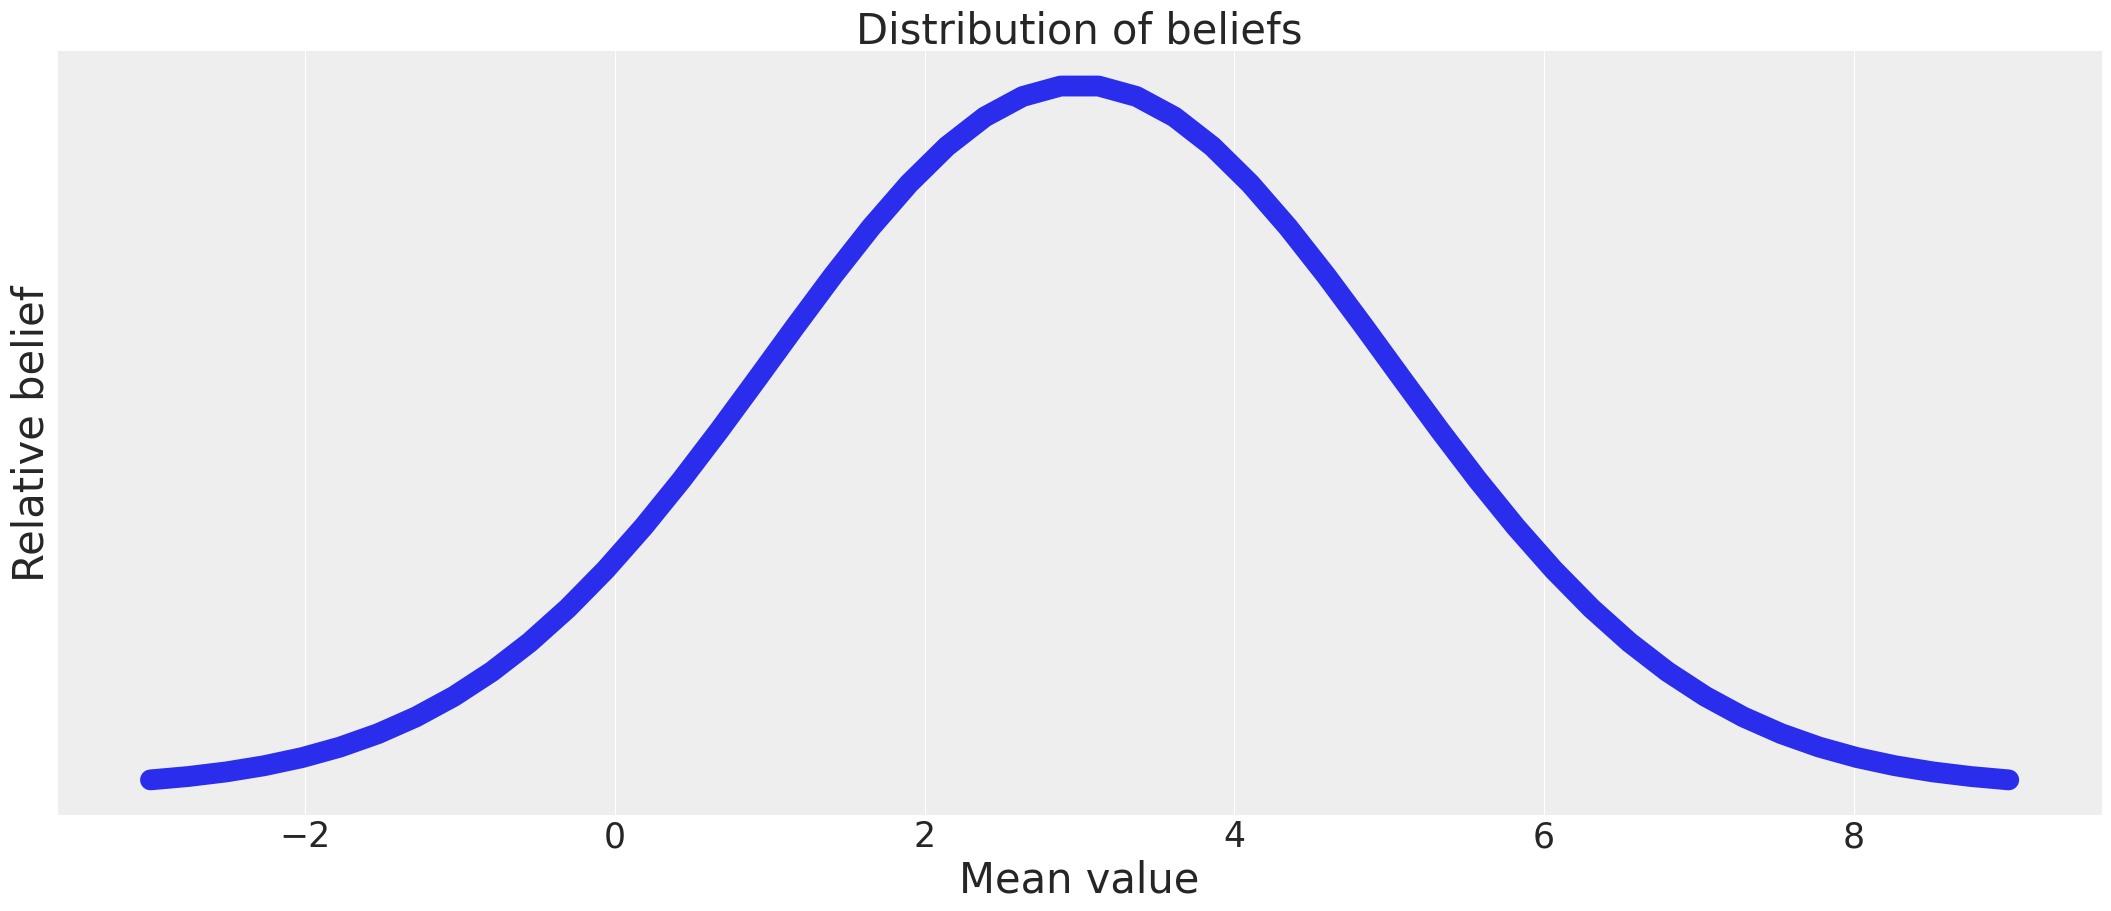

In [5]:
mean_belief = stats.norm(3, 2)
x = np.linspace(-3, 9)
y = mean_belief.pdf(x)

fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)
ax.set_yticks([])
ax.set_title("Distribution of beliefs", fontsize=30)
ax.set_xlabel("Mean value", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
plt.savefig("img/MeanBelief.png")

<img src="img/MeanBelief.png?modified=12345677" width=100% style="margin-left:auto; margin-right:auto">

# Distributions can be used to describe many things
* The values of things we can directly observe
* Our beliefs in the parameters of other distributions, like the mean of a normal distribution
* Probabilities which are a *special case* of distributions


# Formalizing the intuition
The intuitive description is enough to discuss get the general idea of distributions 

but we do need to be much more specific if we are to perform calculations

# Specification with math notation: Mean point estimate

$$
\LARGE
\bar{Y} = \frac{\sum_{N}^{i=0}Y_i}{N}
$$

This is the way its been done for thousands of years prior to computers

# Specification with math notation: Normal Distribution
$$
\LARGE
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

In [6]:
μ, σ = 0, 3
x=0
1/(σ*np.sqrt(2*np.pi))*np.exp(-1/2 * ((x-μ)/σ)**2)

0.1329807601338109

#  Specification with code: Normal Distribution
Code is how we will be specifying distributions in this course

In [7]:
μ, σ = 0, 3
x = 0
scipy.stats.norm(μ, σ).pdf(x)

0.1329807601338109

Specifying distributions with code enables computation which will confer many advantages, notably "easy" sampling

*The idea of sampling is fundamental to this course and will be covered in more detail in its own section*

# Segment Summary
* Distributions specify the relative frequency of observations, or relative belief, "of things"
* Distributions can describe many things, such as probability, observations, other parameters
    * Probability distributions are a special case of distributions
* We will be specifying and interacting with distributions primarily through code in this course